In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(
    './data/Meteorite_Landings.csv',
    index_col=1
)
df

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
2,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
6,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
370,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...
31356,Zillah 002,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
30409,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
30410,Zlin,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45716 entries, 1 to 30414
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   nametype     45716 non-null  object 
 2   recclass     45716 non-null  object 
 3   mass (g)     45585 non-null  float64
 4   fall         45716 non-null  object 
 5   year         45425 non-null  float64
 6   reclat       38401 non-null  float64
 7   reclong      38401 non-null  float64
 8   GeoLocation  38401 non-null  object 
dtypes: float64(4), object(5)
memory usage: 3.5+ MB


I am interested in seeing the years with the most meteorite landings according to this dataset from Nasa

<AxesSubplot: >

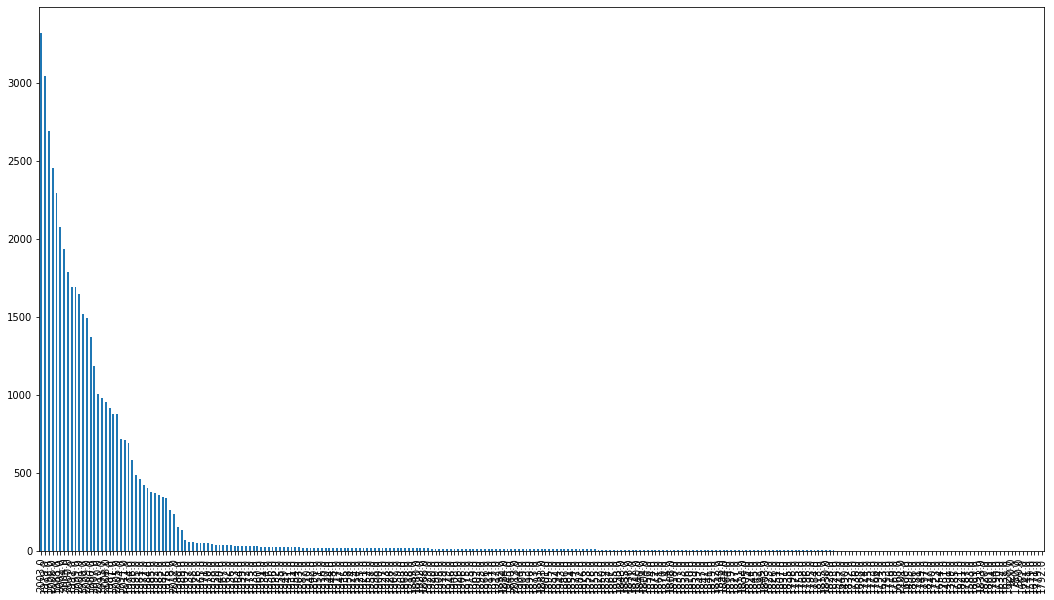

In [4]:
df['year'].value_counts().plot(kind='bar', figsize=(18,10))

This chart is absaloutely unusable due to the wide range of years available and there is simply too many.

In [5]:
year_counts = df['year'].value_counts()
year_counts.describe()

count     265.000000
mean      171.415094
std       505.545941
min         1.000000
25%         2.000000
50%        10.000000
75%        22.000000
max      3323.000000
Name: year, dtype: float64

In [6]:
# lets do the same thing as the above chart but lets look at the upper quartile for the data for the most common years
year_counts = year_counts[year_counts > 22].index 
years_filtered_df = df[df['year'].isin(year_counts)]
years_filtered_df

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
id,,,,,,,,,
10,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
390,Adzhi-Bogdo (stone),Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.83333, 95.16667)"
423,Aioun el Atrouss,Valid,Diogenite-pm,1000.0,Fell,1974.0,16.39806,-9.57028,"(16.39806, -9.57028)"
426,Akaba,Valid,L6,779.0,Fell,1949.0,29.51667,35.05000,"(29.51667, 35.05)"
433,Akyumak,Valid,"Iron, IVA",50000.0,Fell,1981.0,39.91667,42.81667,"(39.91667, 42.81667)"
...,...,...,...,...,...,...,...,...,...
31356,Zillah 002,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
30409,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
30410,Zlin,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"


<AxesSubplot: >

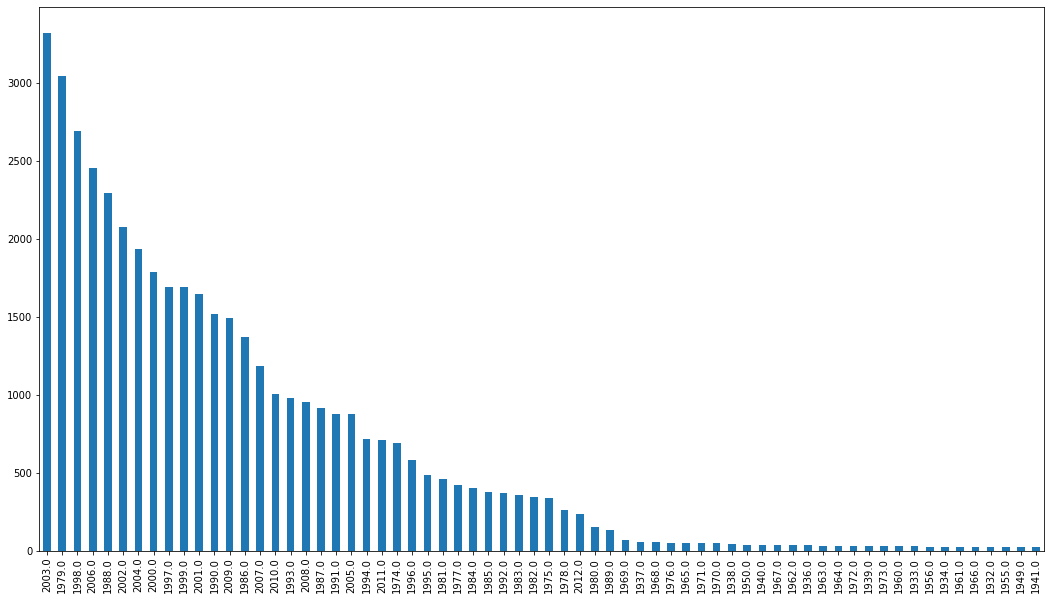

In [7]:
years_filtered_df['year'].value_counts().plot(kind='bar', figsize=(18,10))

This bar graph gives a much better view for the years with the most amount of meteorite landings.

In [21]:
# Similar process for seeing the type of meteorite that is most common.
class_counts = df['recclass'].value_counts()
class_counts.describe()

count     466.000000
mean       98.103004
std       641.800004
min         1.000000
25%         1.000000
50%         4.000000
75%        17.000000
max      8285.000000
Name: recclass, dtype: float64

<AxesSubplot: >

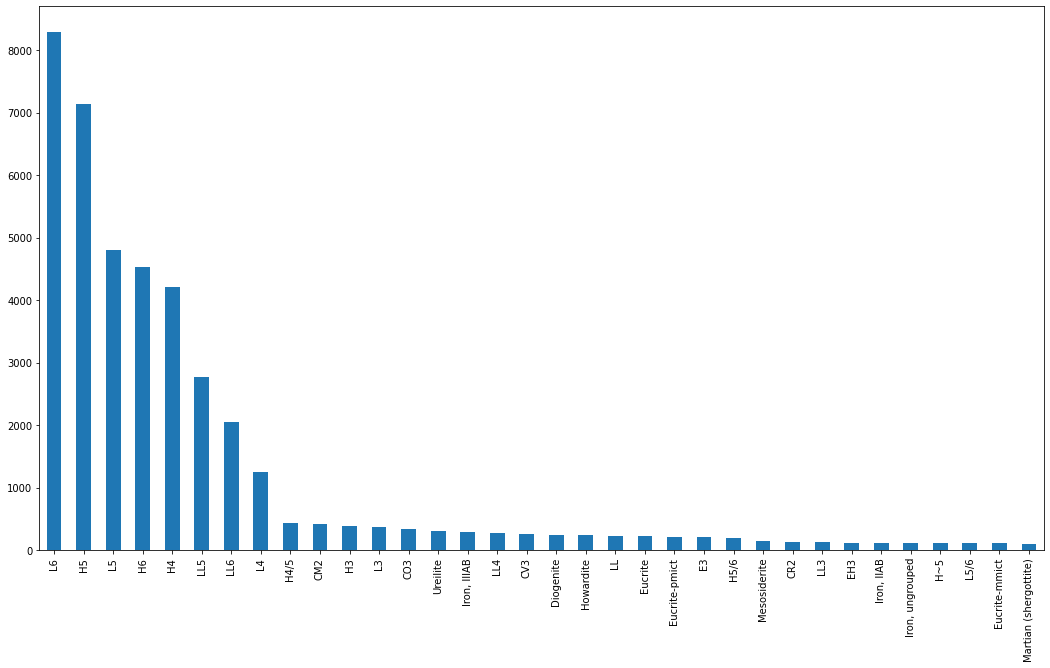

In [22]:
# This time filtering out by the mean of meteorite classes.
class_counts = class_counts[class_counts > class_counts.mean()].index 
class_filtered_df = df[df['recclass'].isin(class_counts)]
class_filtered_df['recclass'].value_counts().plot(kind='bar', figsize=(18,10))